# Mobile price predicition 

The Problem
The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression

In [2]:
train_data = pd.read_csv('D:/Mobile price prediction/train.csv')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
train_data.shape

(2000, 21)

In [6]:
train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape

(1820, 21)

In [7]:
train_data_f.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1820.0,1237.843956,439.940961,501.0,845.50,1230.5,1611.00,1998.0
blue,1820.0,0.503846,0.500123,0.0,0.00,1.0,1.00,1.0
clock_speed,1820.0,1.519670,0.813829,0.5,0.70,1.5,2.20,3.0
dual_sim,1820.0,0.504396,0.500118,0.0,0.00,1.0,1.00,1.0
fc,1820.0,4.319231,4.354894,0.0,1.00,3.0,7.00,19.0
four_g,1820.0,0.524725,0.499526,0.0,0.00,1.0,1.00,1.0
int_memory,1820.0,32.139560,18.114542,2.0,16.00,32.0,48.00,64.0
m_dep,1820.0,0.499890,0.288805,0.1,0.20,0.5,0.80,1.0
mobile_wt,1820.0,140.585714,35.428886,80.0,109.00,141.5,170.25,200.0
n_cores,1820.0,4.532967,2.289520,1.0,3.00,5.0,7.00,8.0


Let us visualize the number of elements in each class of mobile phones.

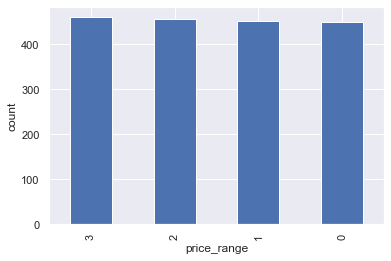

In [8]:
sns.set()
train_data_f['price_range'].value_counts().plot(kind = 'bar')
plt.xlabel('price_range')
plt.ylabel('count')
plt.show()

there are mobile phones in 4 price ranges. The number of elements is almost similar.

# Data Distribution

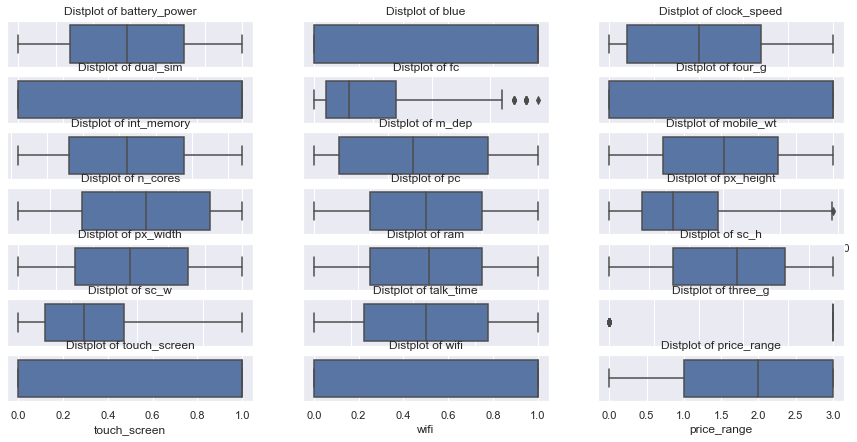

In [9]:
plt.figure(figsize=(15,7))
features = train_data_f.columns
for i in range(len(features)):
    plt.subplot(7,3,i+1)
    sns.boxplot(x=train_data_f[features[i]], data = train_data_f, color = 'b')
    plt.title('Distplot of {}'.format(features[i]))

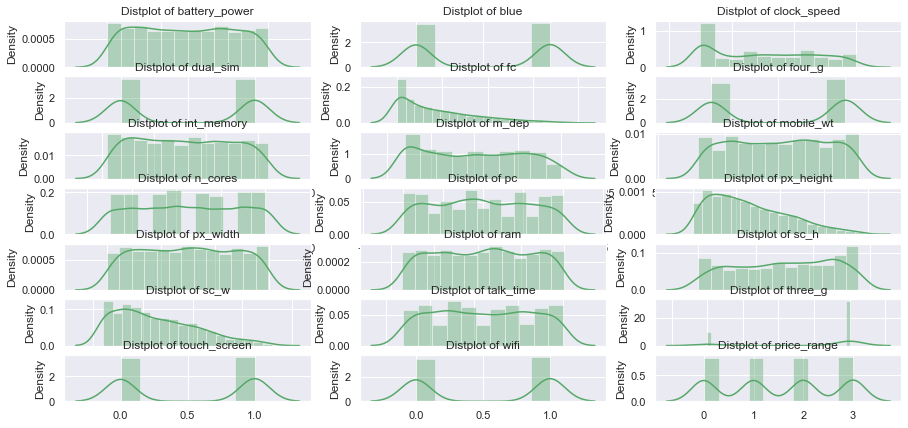

In [10]:
plt.figure(figsize=(15,7))
features = train_data_f.columns
for i in range(len(features)):
    plt.subplot(7,3,i+1)
    sns.distplot(x=train_data_f[features[i]], color = 'g', kde=True)
    plt.title('Distplot of {}'.format(features[i]))

In [24]:
from scipy.stats import zscore
train_data_f = train_data_f.apply(zscore) 
train_data_f = np.train_data_f

AttributeError: module 'numpy' has no attribute 'train_data_f'

In [13]:
train_data_f.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1820.0,-2.928061e-18,1.000275,-1.675330,-0.892056,-0.016698,0.848429,1.728334
blue,1820.0,2.530332e-16,1.000275,-1.007722,-1.007722,0.992337,0.992337,0.992337
clock_speed,1820.0,2.900000e-16,1.000275,-1.253274,-1.007454,-0.024177,0.836191,1.819469
dual_sim,1820.0,1.586033e-17,1.000275,-1.008830,-1.008830,0.991247,0.991247,0.991247
fc,1820.0,8.466976e-17,1.000275,-0.992083,-0.762393,-0.303014,0.615745,3.372023
four_g,1820.0,1.359108e-16,1.000275,-1.050736,-1.050736,0.951714,0.951714,0.951714
int_memory,1820.0,-3.629575e-17,1.000275,-1.664290,-0.891217,-0.007706,0.875805,1.759316
m_dep,1820.0,1.588473e-16,1.000275,-1.385017,-1.038667,0.000381,1.039428,1.732127
mobile_wt,1820.0,-2.696256e-17,1.000275,-1.710535,-0.891769,0.025813,0.837521,1.677462
n_cores,1820.0,3.879680e-17,1.000275,-1.543528,-0.669742,0.204043,1.077829,1.514722


In [12]:
# train_data_f['battery_power'] = np.log(train_data_f['battery_power'] )
# # train_data_f['mobile_wt'] = np.log(train_data_f['mobile_wt'] )
# # train_data_f['px_height'] = np.log(train_data_f['px_height'] )
# train_data_f['px_width'] = np.log(train_data_f['px_width'] )
# train_data_f['ram'] = np.log(train_data_f['ram'] )

# # train_data_f.head()

# Spliting the data

In [16]:
X = train_data_f.drop(['price_range'],axis=1)
y = train_data_f.pop('price_range')

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 7)

# Confusion Matrix

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

# Random Forest classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap = True,
                            max_depth = 7,
                            max_features = 15,
                            min_samples_leaf = 3,
                            min_samples_split = 10,
                            n_estimators = 200,
                            random_state = 7)

Now, we do the training and prediction.

In [21]:
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_valid)

ValueError: Unknown label type: 'continuous'

# Apply the function for the accuracy metrics.

Random Forest classifier Accuracy Score:  0.9093406593406593
******************************************************************************
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.90      0.92      0.91        92
           2       0.82      0.86      0.84        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



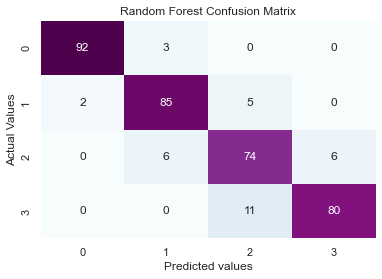

In [19]:
print('Random Forest classifier Accuracy Score: ', accuracy_score(y_valid, y_pred_rfc))
print('******************************************************************************')
cm_rfc = my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')

In [20]:
Rf_test_metrics=classification_report(y_valid, y_pred_rfc,output_dict=True)
df=pd.DataFrame(Rf_test_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
rf_test_acc=round(df.loc["accuracy"][3],2)
print ('GDBO_test_precision ',rf_test_precision)
print ('GDBO_test_recall ',rf_test_recall)
print ('GDBO_test_f1 ',rf_test_f1)
print ('GDBO_test_acc ',rf_test_acc)

GDBO_test_precision  0.9
GDBO_test_recall  0.92
GDBO_test_f1  0.91
GDBO_test_acc  0.91


we can see that the random forest algorithm has good accuracy in prediction.

# Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [22]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_valid)

Gaussian Naive Bayes Classifier: 0.8461538461538461
**********************************************************************
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.79      0.73      0.76        92
           2       0.74      0.80      0.77        86
           3       0.92      0.93      0.93        91

    accuracy                           0.85       364
   macro avg       0.84      0.85      0.84       364
weighted avg       0.85      0.85      0.85       364



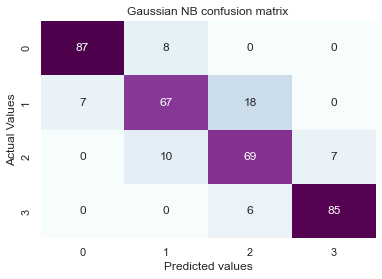

In [23]:
print('Gaussian Naive Bayes Classifier:', accuracy_score(y_valid, y_pred_gnb))
print('**********************************************************************')
cm_gb = my_confusion_matrix(y_valid, y_pred_gnb,'Gaussian NB confusion matrix')


In [24]:
Nb_test_metrics=classification_report(y_valid, y_pred_gnb,output_dict=True)
df=pd.DataFrame(Nb_test_metrics).transpose()
nb_test_precision=round(df.loc["1"][0],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_f1=round(df.loc["1"][2],2)
nb_test_acc=round(df.loc["accuracy"][3],2)
print ('GDBO_test_precision ',nb_test_precision)
print ('GDBO_test_recall ',nb_test_recall)
print ('GDBO_test_f1 ',nb_test_f1)
print ('GDBO_test_acc ',nb_test_acc)

GDBO_test_precision  0.79
GDBO_test_recall  0.73
GDBO_test_f1  0.76
GDBO_test_acc  0.85


# KNN Classifier

In [25]:
from sklearn.neighbors  import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, leaf_size=25)

In [26]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_valid)

Gaussian Naive Bayes Classifier: 0.9340659340659341
**********************************************************************
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



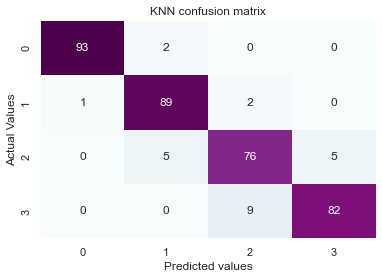

In [27]:
print('Gaussian Naive Bayes Classifier:', accuracy_score(y_valid, y_pred_knn))
print('**********************************************************************')
cm_knn = my_confusion_matrix(y_valid, y_pred_knn,'KNN confusion matrix')

In [28]:
knn_test_metrics=classification_report(y_valid, y_pred_knn,output_dict=True)
df=pd.DataFrame(knn_test_metrics).transpose()
knn_test_precision=round(df.loc["1"][0],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_f1=round(df.loc["1"][2],2)
knn_test_acc=round(df.loc["accuracy"][3],2)
print ('GDBO_test_precision ',knn_test_precision)
print ('GDBO_test_recall ',knn_test_recall)
print ('GDBO_test_f1 ',knn_test_f1)
print ('GDBO_test_acc ',knn_test_acc)

GDBO_test_precision  0.93
GDBO_test_recall  0.97
GDBO_test_f1  0.95
GDBO_test_acc  0.93


# XGBOOST classifier

In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
from xgboost import XGBClassifier
xgbst = XGBClassifier(n_estimators=100, max_depth=20, learning_rate=1, objective='binary:logistic')

In [31]:
xgbst.fit(X_train, y_train)
y_pred_xgbst = xgbst.predict(X_valid)

XGBoost Classifier: 0.9285714285714286
**********************************************************************
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        95
           1       0.91      0.93      0.92        92
           2       0.87      0.91      0.89        86
           3       0.95      0.92      0.94        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



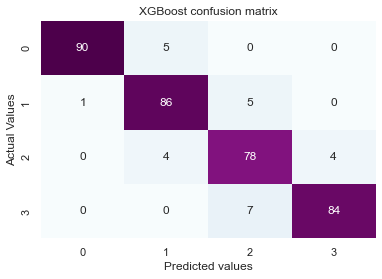

In [32]:
print('XGBoost Classifier:', accuracy_score(y_valid, y_pred_xgbst))
print('**********************************************************************')
cm_xgbst = my_confusion_matrix(y_valid, y_pred_xgbst,'XGBoost confusion matrix')

In [33]:
xgb_test_metrics=classification_report(y_valid, y_pred_xgbst,output_dict=True)
df=pd.DataFrame(xgb_test_metrics).transpose()
xgb_test_precision=round(df.loc["1"][0],2)
xgb_test_recall=round(df.loc["1"][1],2)
xgb_test_f1=round(df.loc["1"][2],2)
xgb_test_acc=round(df.loc["accuracy"][3],2)
print ('GDBO_test_precision ',xgb_test_precision)
print ('GDBO_test_recall ',xgb_test_recall)
print ('GDBO_test_f1 ',xgb_test_f1)
print ('GDBO_test_acc ',xgb_test_acc)

GDBO_test_precision  0.91
GDBO_test_recall  0.93
GDBO_test_f1  0.92
GDBO_test_acc  0.93


# SVM Classifier

In [34]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')

In [35]:
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)

SVM Classifier Accuracy Score:  0.9587912087912088
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.94      0.93      0.94        86
           3       0.99      0.96      0.97        91

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



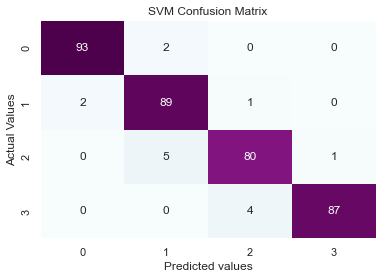

In [36]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

In [37]:
svm_test_metrics=classification_report(y_valid, y_pred_svm,output_dict=True)
df=pd.DataFrame(svm_test_metrics).transpose()
svm_test_precision=round(df.loc["1"][0],2)
svm_test_recall=round(df.loc["1"][1],2)
svm_test_f1=round(df.loc["1"][2],2)
svm_test_acc=round(df.loc["accuracy"][3],2)
print ('GDBO_test_precision ',svm_test_precision)
print ('GDBO_test_recall ',svm_test_recall)
print ('GDBO_test_f1 ',svm_test_f1)
print ('GDBO_test_acc ',svm_test_acc)

GDBO_test_precision  0.93
GDBO_test_recall  0.97
GDBO_test_f1  0.95
GDBO_test_acc  0.96


# ANN

In [38]:
#from scipy.stats import zscore
from sklearn.neural_network import MLPClassifier

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()

In [42]:
#Scale the training data
X_train_scaled = sc.fit_transform(X_train)

In [43]:
X_train_scaled

array([[ 0.55282224, -0.9863568 ,  1.84729485, ...,  0.55513611,
         0.99315529, -1.01522579],
       [ 0.82403725,  1.01383192, -1.23279917, ...,  0.55513611,
        -1.00689188,  0.98500256],
       [ 0.92659755,  1.01383192, -1.23279917, ...,  0.55513611,
        -1.00689188,  0.98500256],
       ...,
       [-0.05114397, -0.9863568 , -0.61678037, ..., -1.80136003,
         0.99315529,  0.98500256],
       [ 0.51863547, -0.9863568 , -1.23279917, ...,  0.55513611,
        -1.00689188, -1.01522579],
       [-1.37075315, -0.9863568 , -1.10959541, ...,  0.55513611,
         0.99315529, -1.01522579]])

In [44]:
# Apply the transformation on the test data
X_valid_scaled = sc.transform(X_valid)

In [45]:
X_valid_scaled

array([[-3.40591922e-01,  1.01383192e+00, -1.23279917e+00, ...,
        -1.80136003e+00,  9.93155293e-01, -1.01522579e+00],
       [ 1.67186906e+00,  1.01383192e+00, -7.61561708e-04, ...,
         5.55136110e-01,  9.93155293e-01, -1.01522579e+00],
       [ 1.18641698e+00, -9.86356796e-01, -1.10959541e+00, ...,
         5.55136110e-01,  9.93155293e-01, -1.01522579e+00],
       ...,
       [-8.69347243e-01,  1.01383192e+00,  1.22442199e-01, ...,
         5.55136110e-01, -1.00689188e+00, -1.01522579e+00],
       [ 7.51105486e-01, -9.86356796e-01, -1.23965322e-01, ...,
         5.55136110e-01,  9.93155293e-01, -1.01522579e+00],
       [-3.97569866e-01,  1.01383192e+00,  1.10807228e+00, ...,
         5.55136110e-01, -1.00689188e+00, -1.01522579e+00]])

In [46]:
ann = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [47]:
ann.fit(X_train_scaled, y_train)
y_pred_ann=ann.predict(X_valid_scaled)

Iteration 1, loss = 1.52235111
Iteration 2, loss = 1.50347373
Iteration 3, loss = 1.47830260
Iteration 4, loss = 1.45186998
Iteration 5, loss = 1.42689733
Iteration 6, loss = 1.40328154
Iteration 7, loss = 1.38227641
Iteration 8, loss = 1.36175803
Iteration 9, loss = 1.34321814
Iteration 10, loss = 1.32557734
Iteration 11, loss = 1.30888199
Iteration 12, loss = 1.29299168
Iteration 13, loss = 1.27793076
Iteration 14, loss = 1.26352361
Iteration 15, loss = 1.24984710
Iteration 16, loss = 1.23640432
Iteration 17, loss = 1.22355390
Iteration 18, loss = 1.21098461
Iteration 19, loss = 1.19878902
Iteration 20, loss = 1.18680418
Iteration 21, loss = 1.17502518
Iteration 22, loss = 1.16371230
Iteration 23, loss = 1.15256976
Iteration 24, loss = 1.14163341
Iteration 25, loss = 1.13107644
Iteration 26, loss = 1.12066656
Iteration 27, loss = 1.11052413
Iteration 28, loss = 1.10062776
Iteration 29, loss = 1.09091800
Iteration 30, loss = 1.08134827
Iteration 31, loss = 1.07195151
Iteration 32, los

ANN Classifier Accuracy Score:  0.6153846153846154
              precision    recall  f1-score   support

           0       0.62      0.89      0.73        95
           1       0.63      0.28      0.39        92
           2       0.56      0.43      0.49        86
           3       0.64      0.84      0.72        91

    accuracy                           0.62       364
   macro avg       0.61      0.61      0.58       364
weighted avg       0.61      0.62      0.59       364



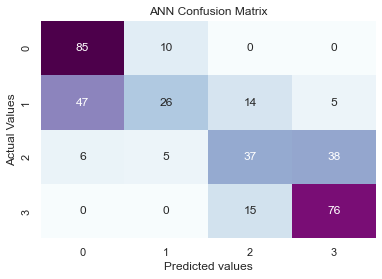

In [48]:
print('ANN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_ann))
cm_ann=my_confusion_matrix(y_valid, y_pred_ann, 'ANN Confusion Matrix')

In [49]:
ann_test_metrics=classification_report(y_valid, y_pred_ann,output_dict=True)
df=pd.DataFrame(ann_test_metrics).transpose()
ann_test_precision=round(df.loc["1"][0],2)
ann_test_recall=round(df.loc["1"][1],2)
ann_test_f1=round(df.loc["1"][2],2)
ann_test_acc=round(df.loc["accuracy"][3],2)
print ('GDBO_test_precision ',ann_test_precision)
print ('GDBO_test_recall ',ann_test_recall)
print ('GDBO_test_f1 ',ann_test_f1)
print ('GDBO_test_acc ',ann_test_acc)

GDBO_test_precision  0.63
GDBO_test_recall  0.28
GDBO_test_f1  0.39
GDBO_test_acc  0.62


# Ensemble learning - Bagging

In [50]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=123)
bgcl.fit(X_train, y_train)
y_pred_bgcl=bgcl.predict(X_valid)


Bgcl Classifier Accuracy Score:  0.9065934065934066
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        95
           1       0.91      0.90      0.91        92
           2       0.82      0.87      0.85        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



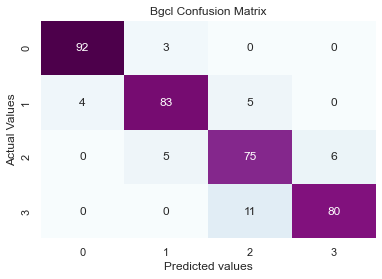

In [51]:
print('Bgcl Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_bgcl))
cm_bgcl=my_confusion_matrix(y_valid, y_pred_bgcl, 'Bgcl Confusion Matrix')

In [52]:
bg_test_metrics=classification_report(y_valid, y_pred_bgcl,output_dict=True)
df=pd.DataFrame(bg_test_metrics).transpose()
bg_test_precision=round(df.loc["1"][0],2)
bg_test_recall=round(df.loc["1"][1],2)
bg_test_f1=round(df.loc["1"][2],2)
bg_test_acc=round(df.loc["accuracy"][3],2)
print ('GDBO_test_precision ',bg_test_precision)
print ('GDBO_test_recall ',bg_test_recall)
print ('GDBO_test_f1 ',bg_test_f1)
print ('GDBO_test_acc ',bg_test_acc)

GDBO_test_precision  0.91
GDBO_test_recall  0.9
GDBO_test_f1  0.91
GDBO_test_acc  0.91


# Ensemble Learning - AdaBoosting

In [53]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 100, random_state=1)

ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_valid)

ADA Classifier Accuracy Score:  0.6401098901098901
              precision    recall  f1-score   support

           0       0.97      0.29      0.45        95
           1       0.53      0.90      0.66        92
           2       0.59      0.91      0.71        86
           3       1.00      0.48      0.65        91

    accuracy                           0.64       364
   macro avg       0.77      0.65      0.62       364
weighted avg       0.77      0.64      0.62       364



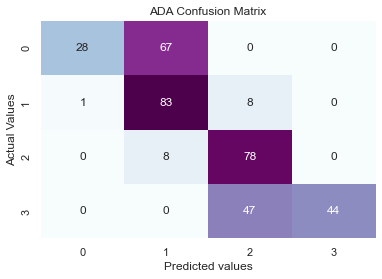

In [54]:
print('ADA Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_ada))
cm_ada=my_confusion_matrix(y_valid, y_pred_ada, 'ADA Confusion Matrix')

In [55]:
ada_test_metrics=classification_report(y_valid, y_pred_ada,output_dict=True)
df=pd.DataFrame(ada_test_metrics).transpose()
ada_test_precision=round(df.loc["1"][0],2)
ada_test_recall=round(df.loc["1"][1],2)
ada_test_f1=round(df.loc["1"][2],2)
ada_test_acc=round(df.loc["accuracy"][3],2)
print ('GDBO_test_precision ',ada_test_precision)
print ('GDBO_test_recall ',ada_test_recall)
print ('GDBO_test_f1 ',ada_test_f1)
print ('GDBO_test_acc ',ada_test_acc)

GDBO_test_precision  0.53
GDBO_test_recall  0.9
GDBO_test_f1  0.66
GDBO_test_acc  0.64


# Ensemble Learning - GradientBoost

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
y_pred_gb = gbcl.predict(X_valid)

GB Classifier Accuracy Score:  0.9258241758241759
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        95
           1       0.90      0.91      0.91        92
           2       0.89      0.90      0.89        86
           3       0.96      0.93      0.94        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



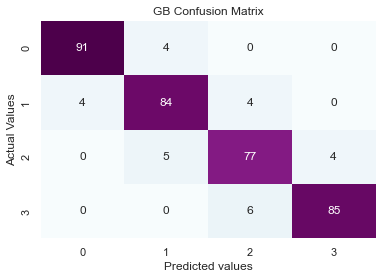

In [57]:
print('GB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gb))
cm_gb=my_confusion_matrix(y_valid, y_pred_gb, 'GB Confusion Matrix')

In [58]:
gb_test_metrics=classification_report(y_valid, y_pred_gb,output_dict=True)
df=pd.DataFrame(gb_test_metrics).transpose()
gb_test_precision=round(df.loc["1"][0],2)
gb_test_recall=round(df.loc["1"][1],2)
gb_test_f1=round(df.loc["1"][2],2)
gb_test_acc=round(df.loc["accuracy"][3],2)
print ('GDBO_test_precision ',gb_test_precision)
print ('GDBO_test_recall ',gb_test_recall)
print ('GDBO_test_f1 ',gb_test_f1)
print ('GDBO_test_acc ',gb_test_acc)

GDBO_test_precision  0.9
GDBO_test_recall  0.91
GDBO_test_f1  0.91
GDBO_test_acc  0.93


In [59]:
index = ['RandomFores','NaiveBayes','KNN','XGB','SVM','ANN','BG','Ada','GB']

data = pd.DataFrame({'Test Scores': [rf_test_acc,nb_test_acc,knn_test_acc,xgb_test_acc,svm_test_acc,ann_test_acc,bg_test_acc,ada_test_acc,
gb_test_acc]},index=index)

round(data,4)

,Test Scores
RandomFores,0.91
NaiveBayes,0.85
KNN,0.93
XGB,0.93
SVM,0.96
ANN,0.62
BG,0.91
Ada,0.64
GB,0.93


# Price prediction of Test.csv Using KNN for Prediction

# importing test csv set

In [60]:
test_data = pd.read_csv('D:/Mobile price prediction/test.csv')
testing_data = pd.read_csv('D:/Mobile price prediction/testing_data.csv')
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price_Range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


# Dropping id column from the dataset

In [61]:
test_new = test_data.drop(['Price_Range'],axis=1)
test_new.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


# Predicting price by using best algorthim (here SVM)

In [62]:
predicted_price = svm_clf.predict(test_new)

In [63]:
predicted_price

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 0, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [64]:
testing_data =testing_data.drop(['Unnamed: 0','Price_Range'],axis=1)
testing_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [65]:
testing_data['Price_Range'] =  predicted_price

In [66]:
testing_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price_Range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [67]:
testing_data.to_csv('D:/Mobile price prediction/testing_data.csv')

# Importing train dataset to test the algorithm

In [68]:
t1 = pd.read_csv('D:/Mobile price prediction/train.csv')

# Creating new dataframe to check the entries of price range

In [69]:
t2 = t1.drop('price_range',axis=1)

In [70]:
predicted_price = svm_clf.predict(t2)

In [71]:
predicted_price

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

In [72]:
t1['Price_Range_svm'] =  predicted_price

In [73]:
t1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Price_Range_svm
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1


The above two price_range col's are equal so the SVM accuracy is correct

# To verify the less accuracy algorthims such as ANN,KNN,RF,GNB

In [74]:
predicted_price_ann = ann.predict(t2)
predicted_price_knn = knn.predict(t2)
predicted_price_rf = rfc.predict(t2)
predicted_price_gnb = gnb.predict(t2)

In [75]:
predicted_price

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

In [76]:
t1['Price_Range_ann'] =  predicted_price_ann
t1['Price_Range_knn'] =  predicted_price_knn
t1['Price_Range_rf'] =  predicted_price_rf
t1['Price_Range_gnb'] =  predicted_price_gnb

In [77]:
t1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,talk_time,three_g,touch_screen,wifi,price_range,Price_Range_svm,Price_Range_ann,Price_Range_knn,Price_Range_rf,Price_Range_gnb
0,842,0,2.2,0,1,0,7,0.6,188,2,...,19,0,0,1,1,1,3,1,2,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,7,1,1,0,2,2,3,2,2,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,9,1,1,0,2,2,3,2,2,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,11,1,0,0,2,2,3,3,2,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,15,1,1,0,1,1,3,1,1,1


SVM is the best algorithm to predict the values here. We could the see the varitions in price range columns for ann,knn,rf,gnb.